In [64]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [25]:
raw_data = pd.read_csv('Train.csv')

In [26]:
raw_data.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,...,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,...,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


In [27]:
raw_data.columns

Index(['ID', 'account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

In [28]:
#function for dropping columns
def drop_col(df,col_list):
    for col in col_list:
        if col in df.columns:
            df.drop(col, axis = 1, inplace=True)
    return df

In [29]:
not_req = ['ID','region_code','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq']

In [30]:
#removing unwanted columns 
raw_data = drop_col(raw_data, not_req)

In [31]:
raw_data.columns

Index(['account_type', 'gender', 'age', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'cc_cons'],
      dtype='object')

### personal_loan_active, vehicle_loan_active, personal_loan_closed, vehicle_loan_closed,loan_enq were removed as there was no variance in these variables
### region_code cannot be included as it is categorical and not ordinal

In [32]:
#encoding categorical data using one hot encoding
data = pd.get_dummies(data=raw_data, columns=['account_type', 'gender'])
data.head(5)

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_current,account_type_saving,gender_F,gender_M
0,35,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,10.0,...,12761.0,2.0,65.0,50836.0,1674.09,20014.0,1,0,0,1
1,35,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,...,76206.0,21.0,63.0,23226.0,13043.34,10173.0,1,0,0,1
2,55,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,...,75283.0,7.0,1.0,27036.0,25375.27,16095.0,1,0,0,1
3,29,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,...,68708.0,21.0,83.0,43037.0,3544.33,7707.0,1,0,1,0
4,34,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,...,80140.0,8.0,32.0,32044.0,12780.44,96408.0,1,0,0,1


In [33]:
data.columns

Index(['age', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'cc_cons',
       'account_type_current', 'account_type_saving', 'gender_F', 'gender_M'],
      dtype='object')

In [34]:
cat_cols = ['account_type_current','account_type_saving','gender_F','gender_M']

In [35]:
numerical_data = data.drop(cat_cols, axis=1)
numerical_data.columns

Index(['age', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'cc_cons'],
      dtype='object')

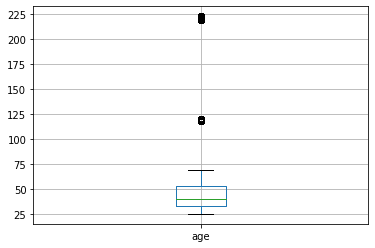

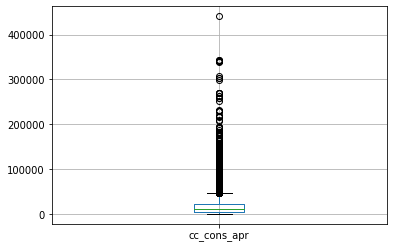

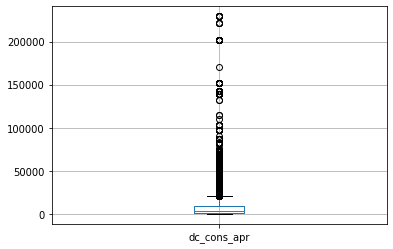

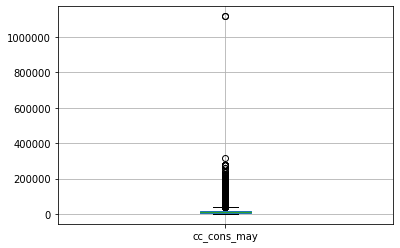

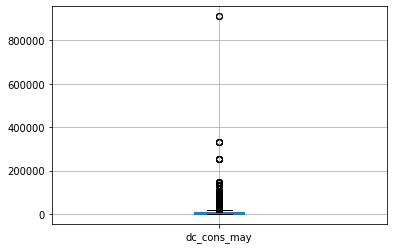

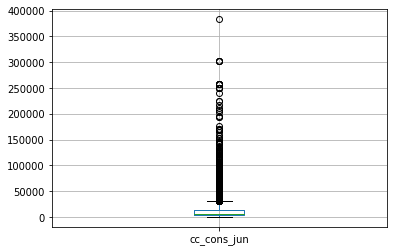

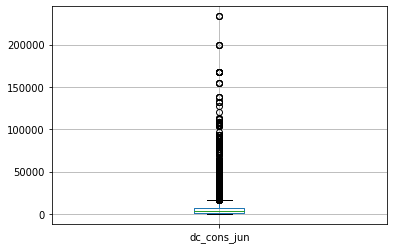

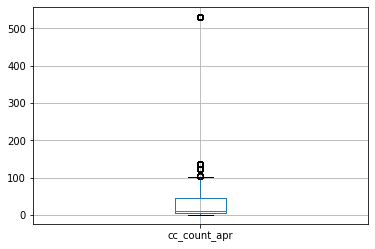

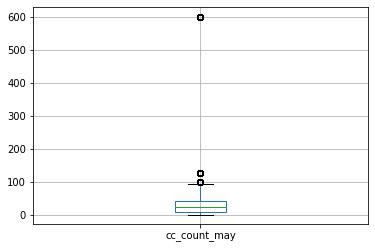

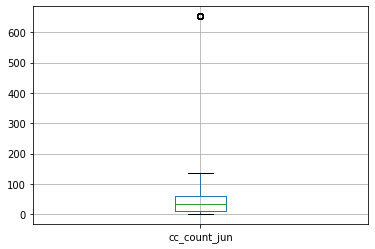

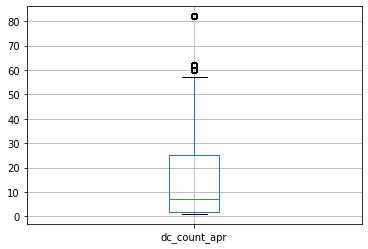

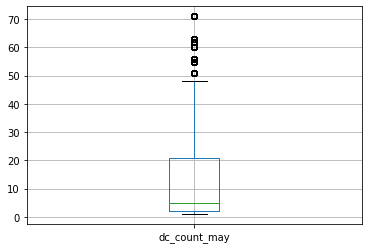

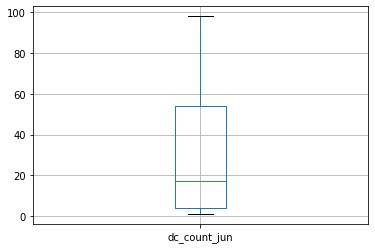

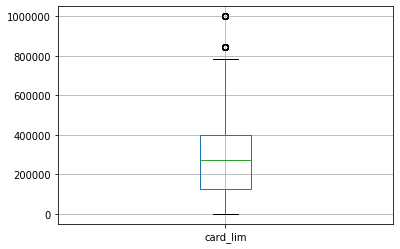

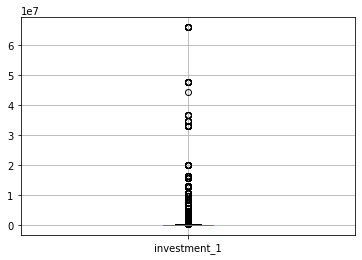

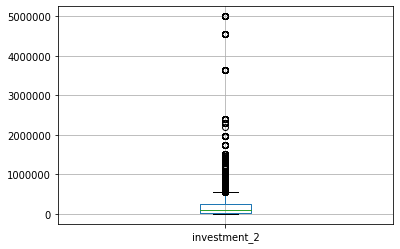

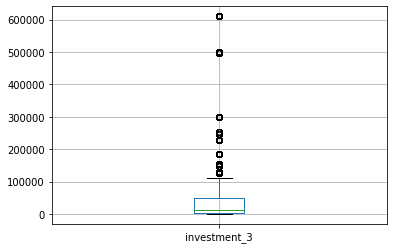

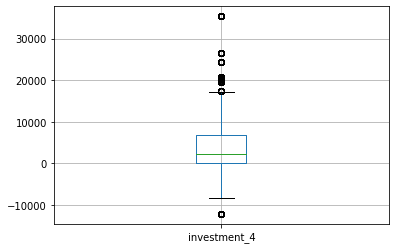

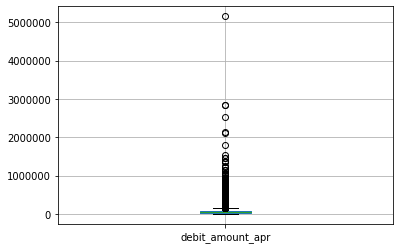

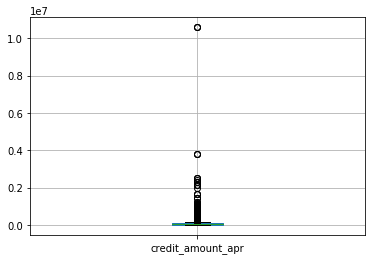

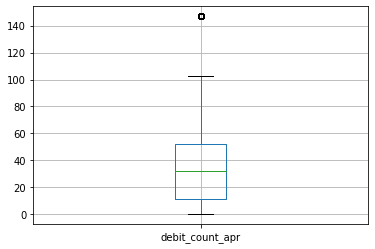

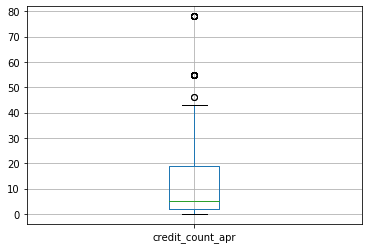

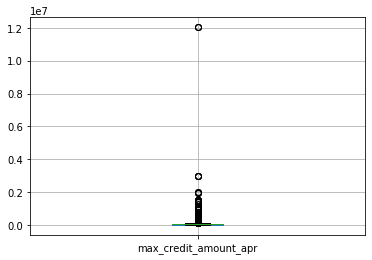

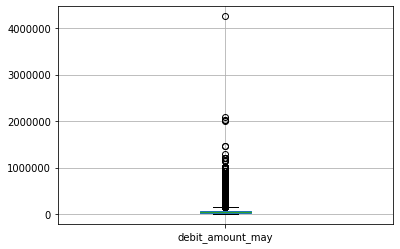

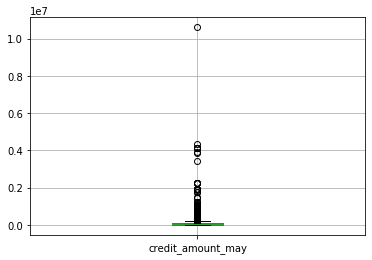

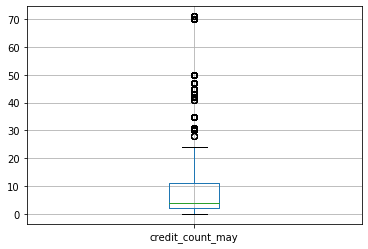

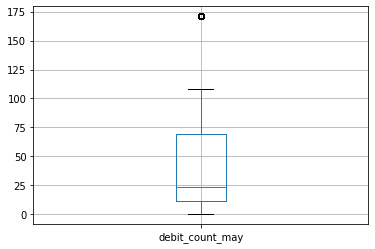

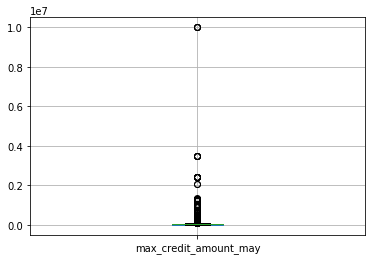

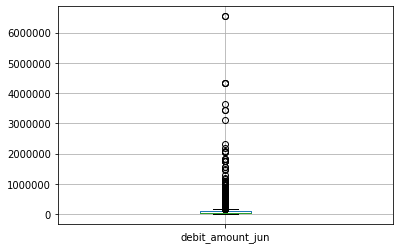

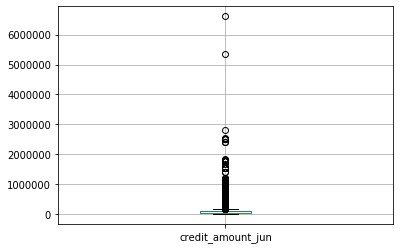

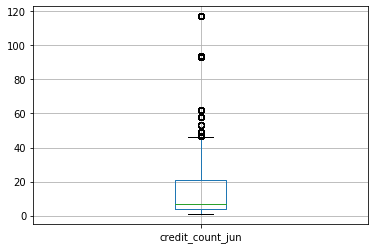

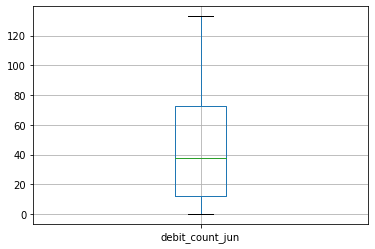

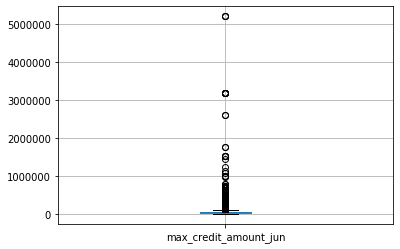

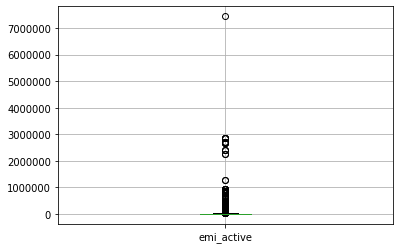

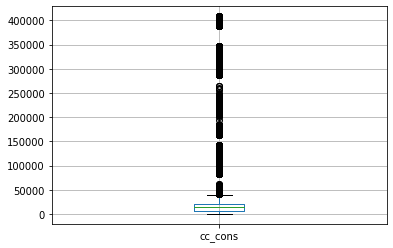

In [36]:
#outlier analysis
for col in numerical_data.columns:
    plt.figure()
    numerical_data.boxplot([col])

In [37]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)    
    return lower_range,upper_range

lr,ur = outlier_treatment(numerical_data['age'])

In [38]:
numerical_data[(numerical_data.age < lr) | (numerical_data.age > ur)]

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
33,118,2448.575,6619.00,1416.500,3228.00,3194.200,6508.58,6.0,29.0,11.0,...,43.0,20.0,5675.00,10588.37,54491.00,22.0,0.0,118159.00,1237.82,20360.0
137,223,9660.860,1557.00,26557.100,3447.00,20961.000,1113.00,63.0,10.0,1.0,...,3.0,104.0,51835.00,248344.03,143165.00,44.0,103.0,66817.00,31745.07,20334.0
145,118,12820.110,11358.00,3304.000,1008.00,24352.570,537.67,17.0,26.0,38.0,...,5.0,171.0,28106.00,90932.03,27472.43,19.0,104.0,67787.00,2633.92,84779.0
194,220,12979.580,1308.00,10771.290,2374.16,14497.540,21189.30,6.0,10.0,10.0,...,0.0,44.0,58685.00,45015.44,37177.75,117.0,32.0,65146.00,5371.53,15891.0
216,120,6111.020,1565.74,35562.320,1615.00,11497.290,1105.00,44.0,65.0,48.0,...,0.0,81.0,46852.00,55645.50,39005.00,14.0,76.0,112000.00,36630.43,111888.0
273,219,3208.190,2287.52,6796.740,5946.00,11521.000,3567.00,50.0,22.0,9.0,...,1.0,50.0,12448.00,43724.25,57446.66,6.0,73.0,1224.39,946.53,9083.0
286,222,3052.250,1135.93,54449.380,2226.73,13672.560,1361.10,531.0,84.0,42.0,...,3.0,75.0,35891.00,70944.02,62474.00,39.0,35.0,31108.00,89661.75,3389.0
320,118,10476.000,139422.60,3127.000,1072.84,6216.220,3028.44,6.0,47.0,3.0,...,4.0,69.0,73710.00,31006.79,20355.00,41.0,79.0,38640.00,1890.34,19449.0
349,120,37079.080,7700.01,8308.900,3182.00,20139.000,949.00,8.0,22.0,4.0,...,6.0,81.0,42178.00,45439.13,28770.00,3.0,14.0,17165.00,1694.71,3570.0
371,219,33719.730,10351.50,27894.980,1159.96,4002.020,15631.00,9.0,77.0,6.0,...,1.0,2.0,19119.00,64235.87,297.78,16.0,73.0,29070.00,462.30,18601.0


In [43]:
numerical_data.drop(numerical_data[(numerical_data.age > ur) | (numerical_data.age < lr) ].index , inplace=True)

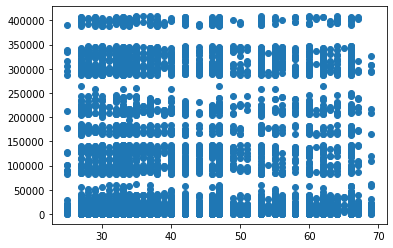

In [45]:
plt.scatter(x=numerical_data['age'], y=numerical_data['cc_cons'])

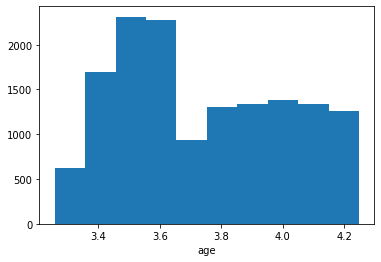

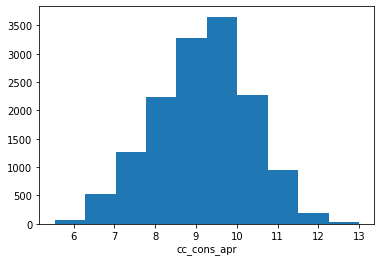

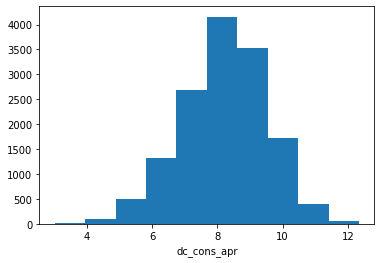

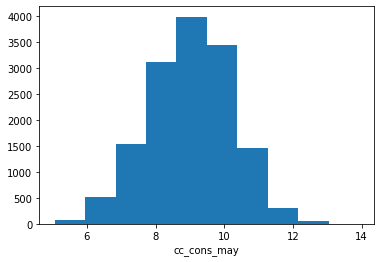

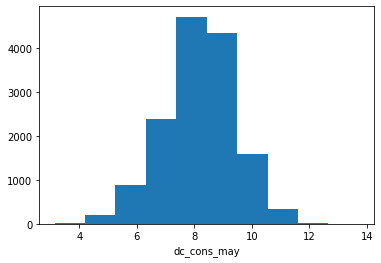

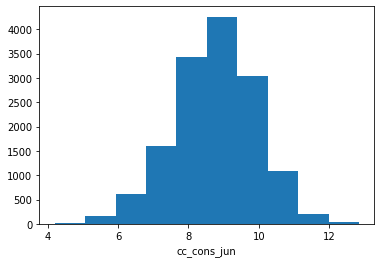

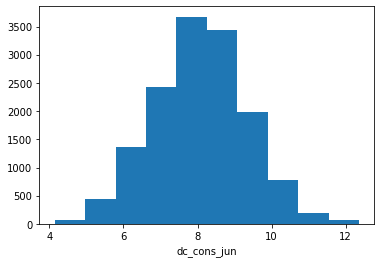

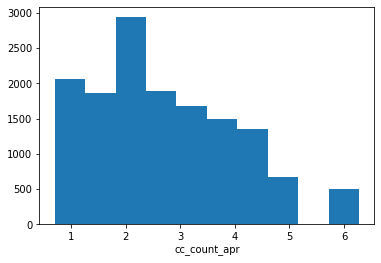

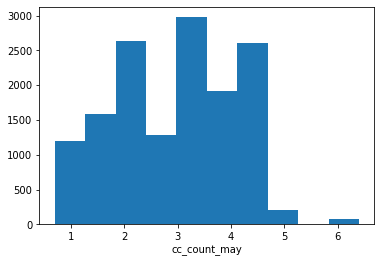

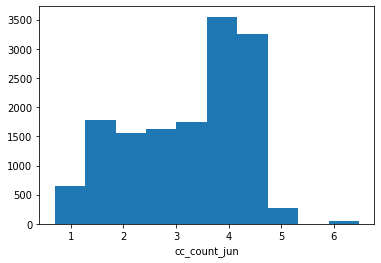

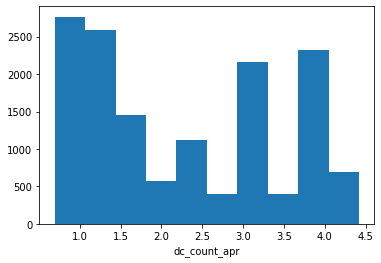

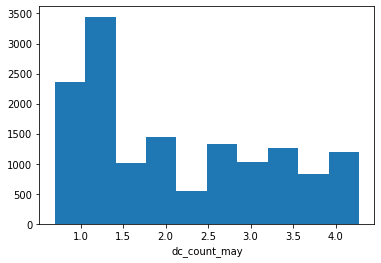

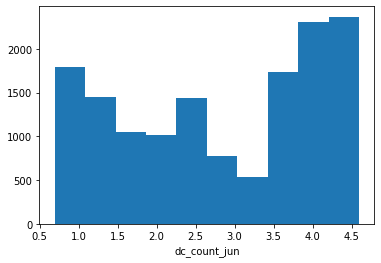

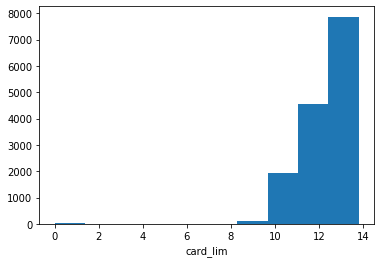

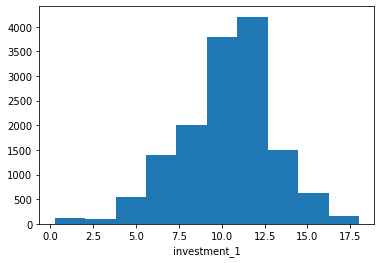

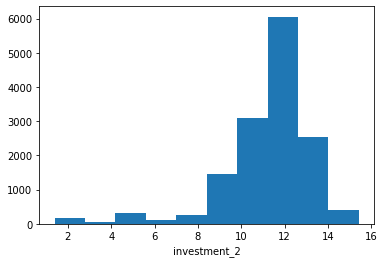

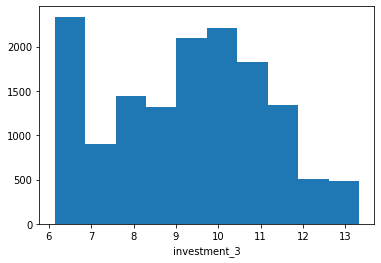

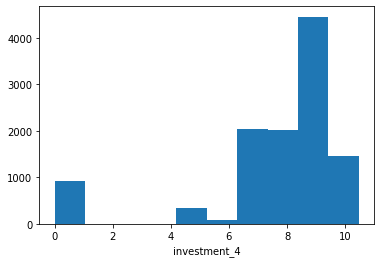

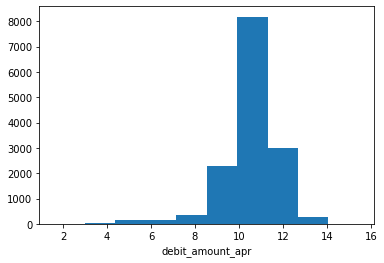

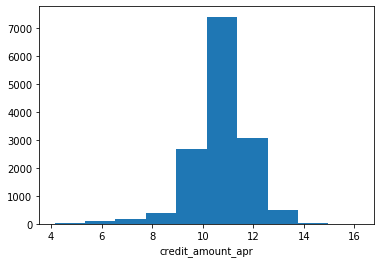

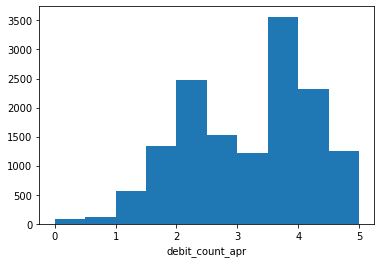

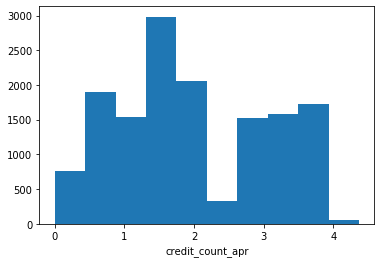

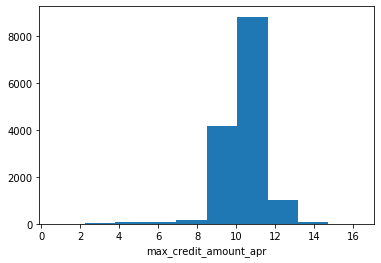

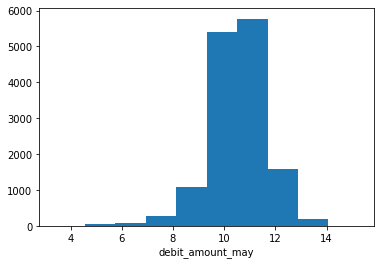

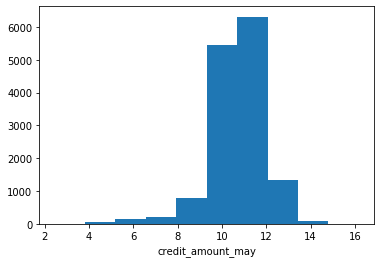

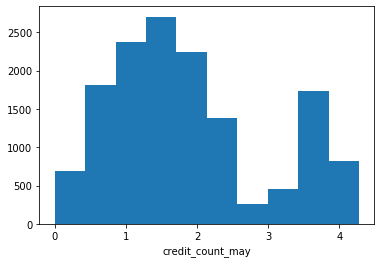

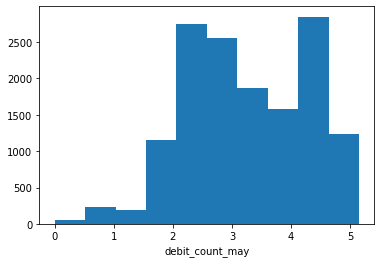

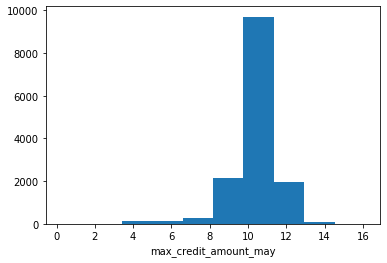

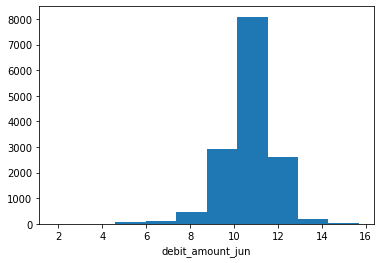

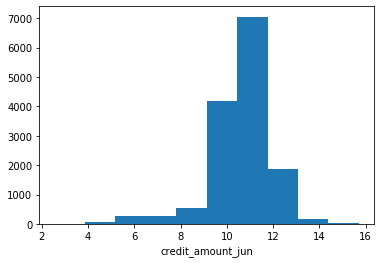

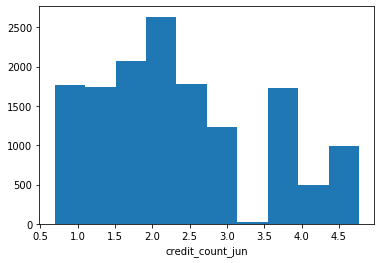

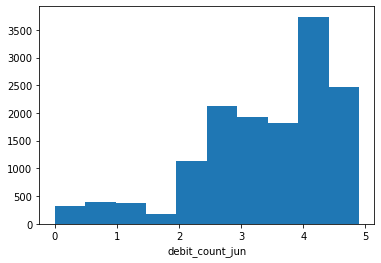

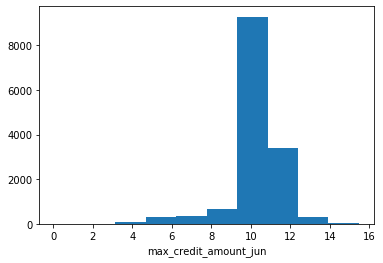

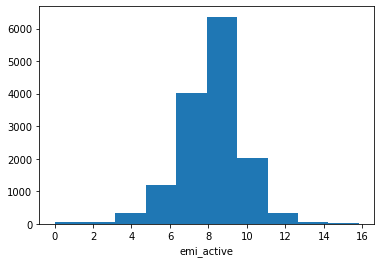

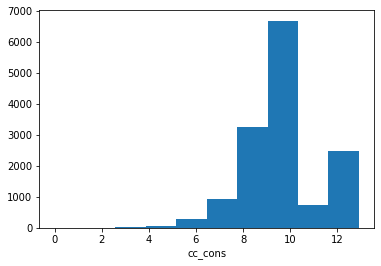

In [52]:
#outlier analysis
for col in numerical_data.columns:
    plt.figure()
    plt.hist(np.log1p(numerical_data[col]))
    plt.xlabel(col)

In [55]:
scaled_features = StandardScaler().fit_transform(numerical_data.values)

In [57]:
scaled_features_df = pd.DataFrame(scaled_features, index=numerical_data.index, columns=numerical_data.columns)

In [58]:
scaled_features_df

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,-0.628808,0.277566,-0.532502,-0.223006,1.150360,0.221685,0.326667,-0.405020,-0.150048,-0.669523,...,-0.589198,-0.021948,-0.160907,-0.300758,-0.441569,-0.659428,0.580976,-0.013424,-0.118561,-0.359476
1,-0.628808,0.040730,-0.492081,0.158218,-0.388368,-0.426780,-0.465964,-0.415315,-0.532856,-0.605679,...,-0.589198,0.917469,-0.163953,-0.222482,-0.017413,0.038753,0.523990,-0.229881,-0.023587,-0.460175
2,1.011088,-0.487062,-0.371228,-0.528584,-0.197390,0.633332,-0.144087,0.017077,-0.029162,1.288354,...,-0.589198,1.016355,-0.229307,-0.117052,-0.023584,-0.475696,-1.242567,-0.200011,0.079428,-0.399578
3,-1.120777,0.500279,-0.473520,-0.137764,0.075242,0.287722,0.493377,0.120028,-0.653742,0.181728,...,0.659564,-0.071391,-0.220120,-0.042601,-0.067540,0.038753,1.093847,-0.074566,-0.102937,-0.485409
4,-0.710803,-0.416922,-0.083735,-0.440492,-0.301839,-0.539347,-0.019245,0.264159,0.273055,0.862729,...,0.719029,0.225267,-0.157688,-0.430356,0.008887,-0.438950,-0.359289,-0.160749,-0.025783,0.422238
5,-1.284766,-0.620401,-0.448666,0.132804,-0.348621,-0.025638,-0.485278,-0.363840,-0.532856,0.373259,...,1.848862,-0.961364,-0.176374,-0.156493,0.809702,-0.659428,-0.273810,-0.276465,-0.090556,0.768664
6,-0.874792,-0.647637,-0.214137,-0.273170,-0.290735,-0.294612,-0.443418,-0.322660,-0.633595,-0.775930,...,-0.589198,-0.392770,-0.181307,-0.318250,0.812814,1.398370,-0.929146,-0.358822,-0.119723,0.596919
7,-1.202771,-0.483495,-0.423542,2.493166,-0.300948,-0.288355,-0.440412,-0.157939,-0.653742,0.373259,...,-0.648663,0.546646,-0.255452,-0.155719,-0.477262,-0.549189,0.381526,0.034117,-0.009835,-0.487906
8,1.995025,-0.684361,-0.393095,0.461515,-0.106309,0.499967,-0.456645,0.521535,0.011134,0.905291,...,3.454414,0.991633,-0.146768,-0.109738,-0.457182,-0.659428,0.979876,-0.312982,-0.094260,-0.505823
9,-0.464818,1.220002,-0.283248,-0.523151,-0.268683,0.194356,-0.109862,-0.363840,-0.593299,0.969135,...,0.302775,1.016355,-0.276887,1.356843,-0.192795,-0.659428,0.523990,-0.266743,0.008122,-0.486023


In [65]:
scaler = MinMaxScaler()
minmax_scaled = scaler.fit_transform(numerical_data)

In [70]:
minmax_scaled_df = pd.DataFrame(minmax_scaled, index=numerical_data.index, columns=numerical_data.columns)

In [72]:
minmax_scaled_df['investment_4'].min()

0.0

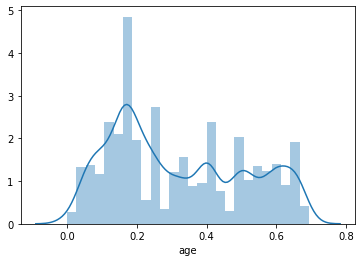

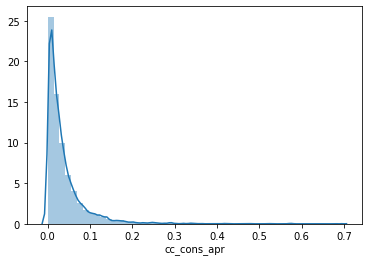

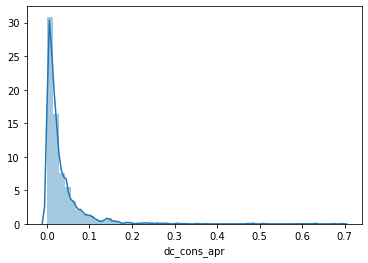

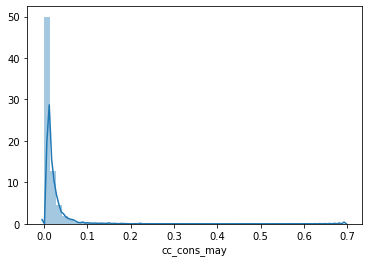

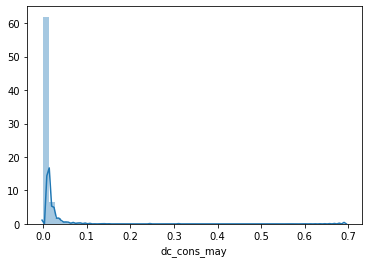

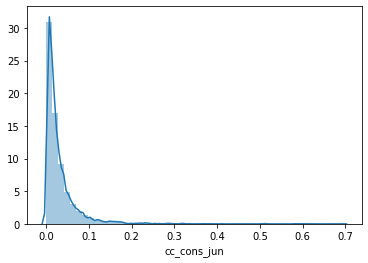

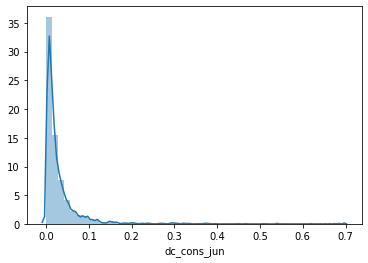

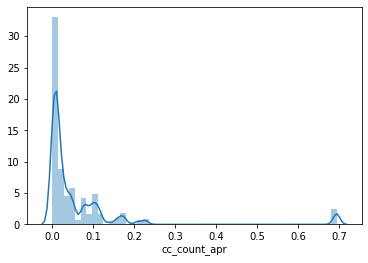

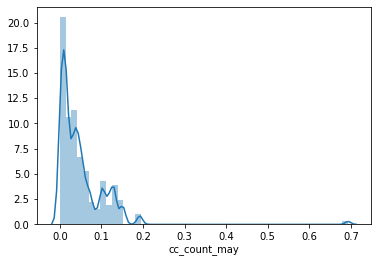

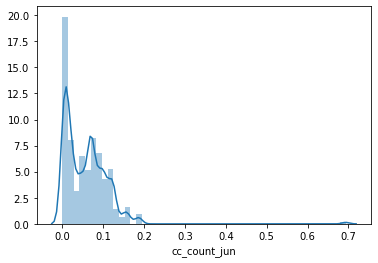

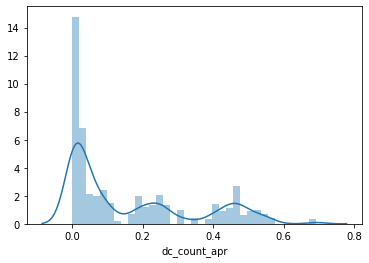

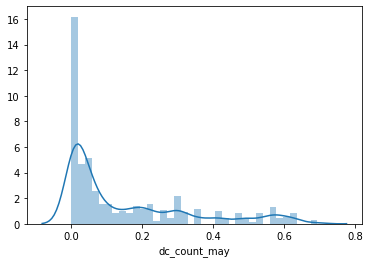

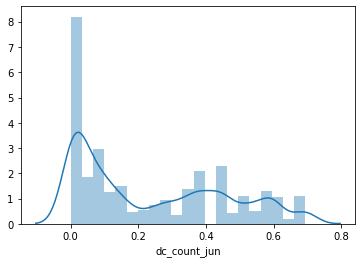

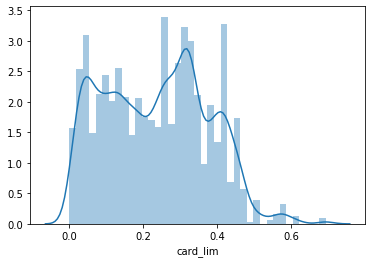

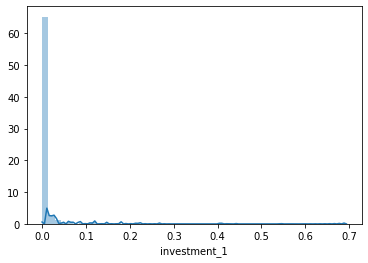

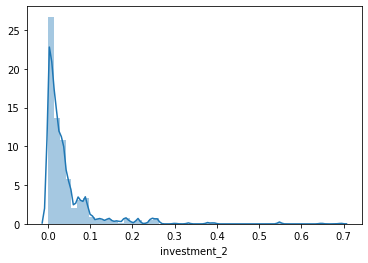

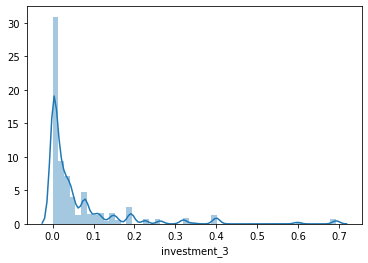

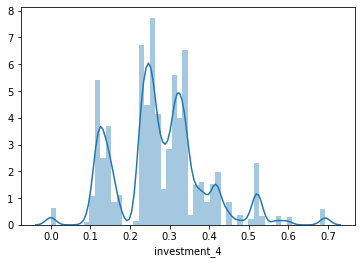

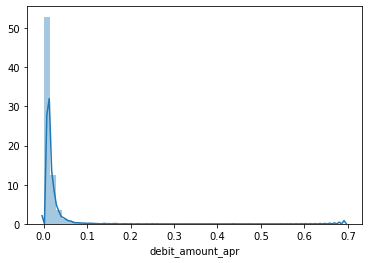

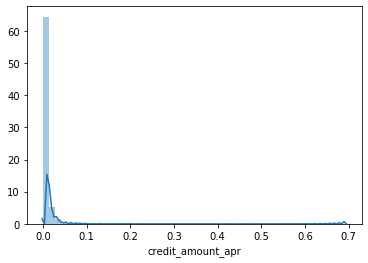

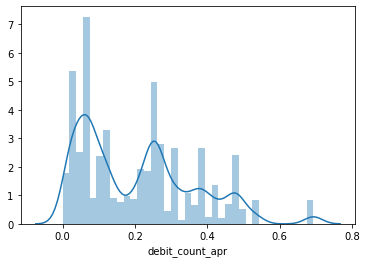

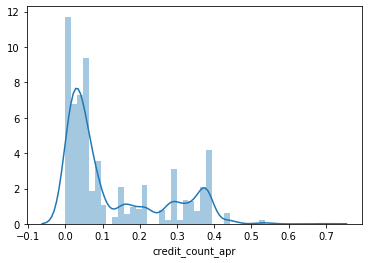

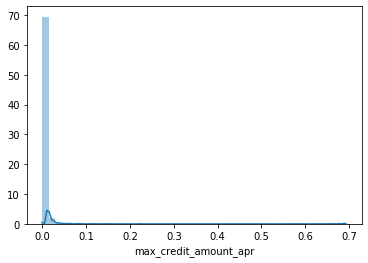

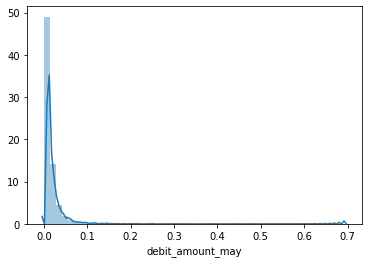

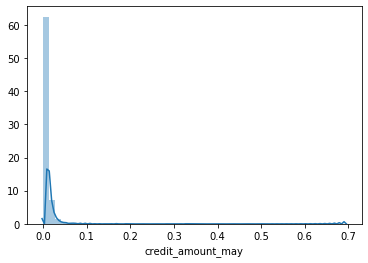

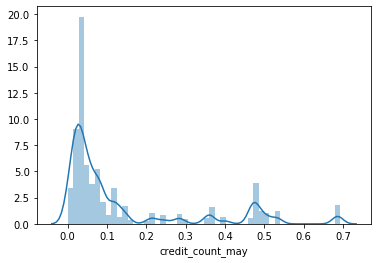

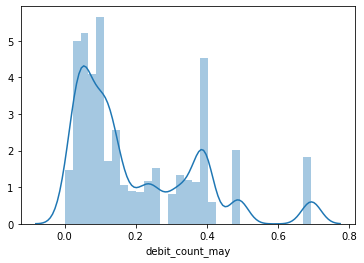

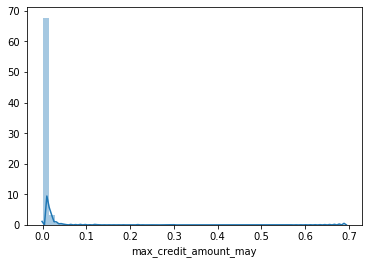

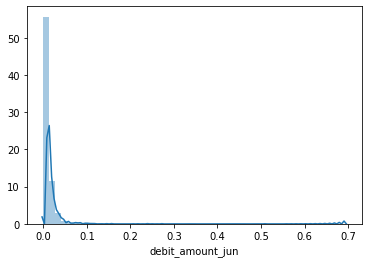

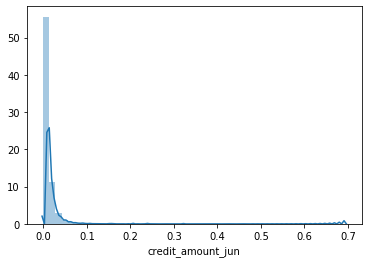

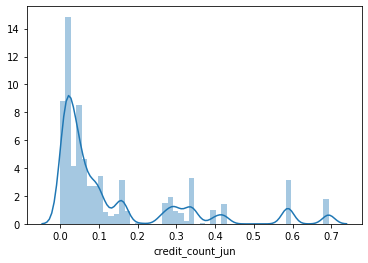

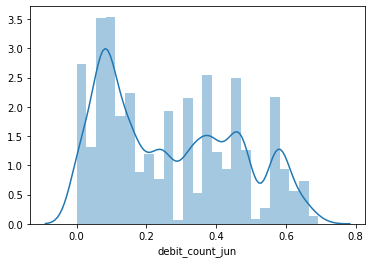

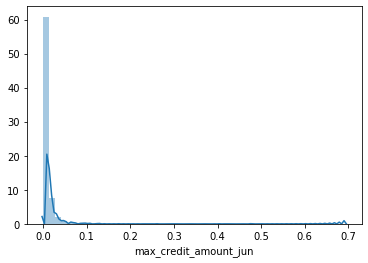

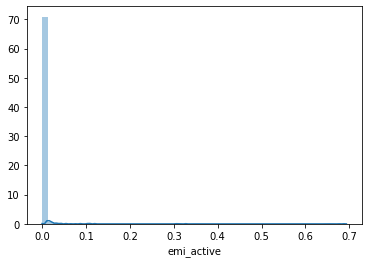

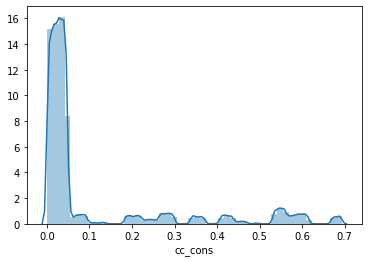

In [75]:
#outlier analysis
for col in minmax_scaled_df.columns:
    plt.figure()
    sns.distplot(np.log1p(minmax_scaled_df[col]))
    plt.xlabel(col)

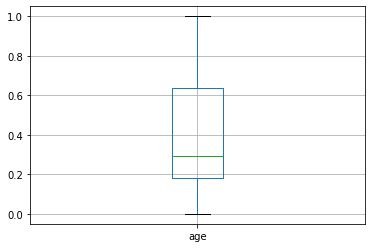

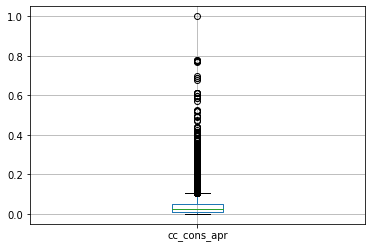

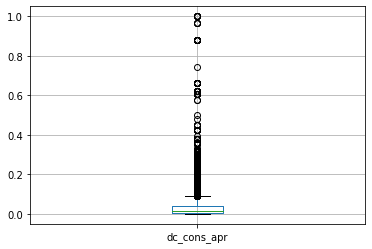

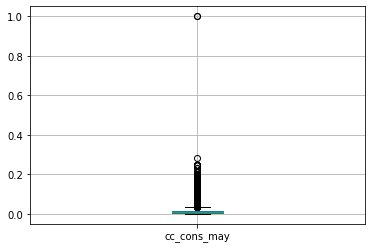

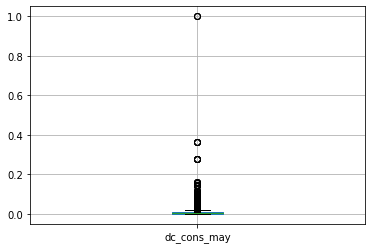

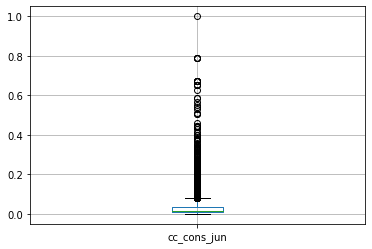

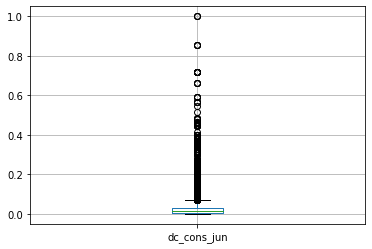

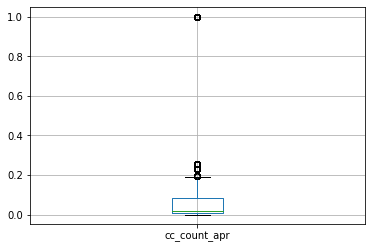

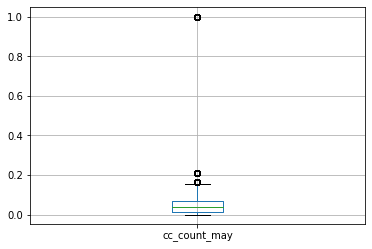

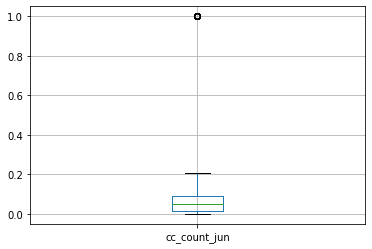

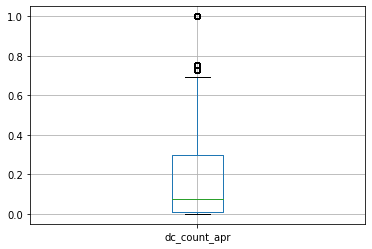

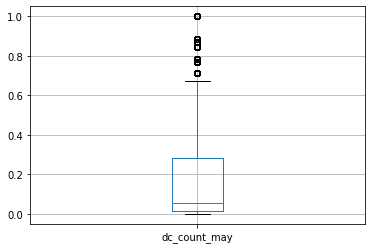

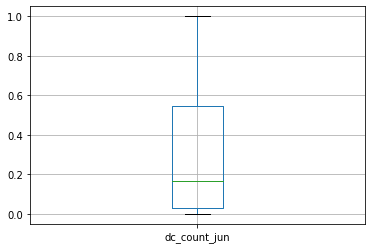

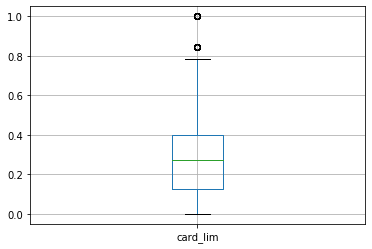

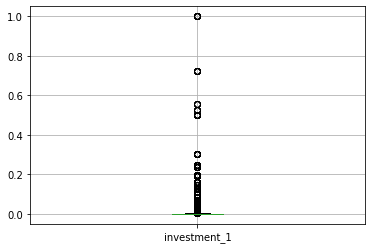

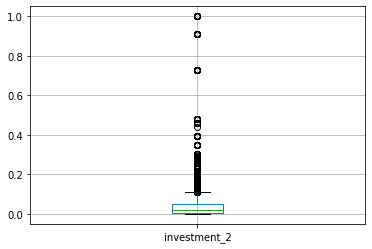

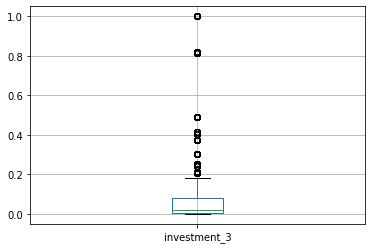

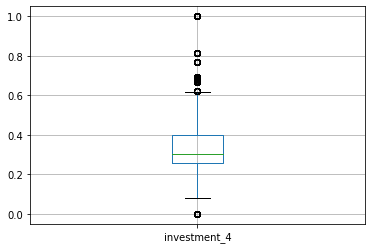

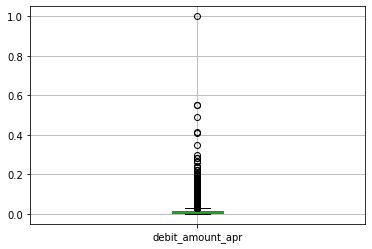

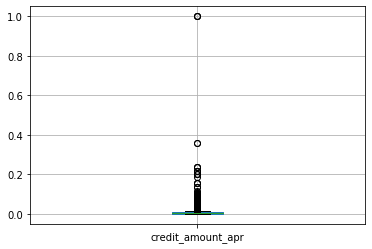

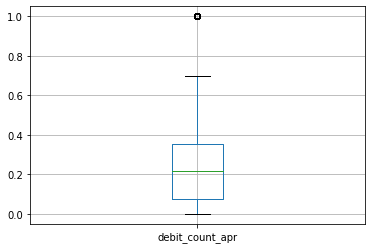

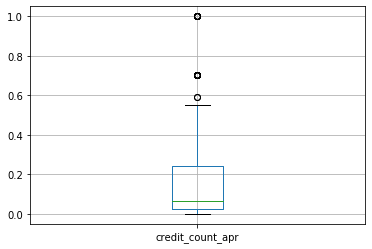

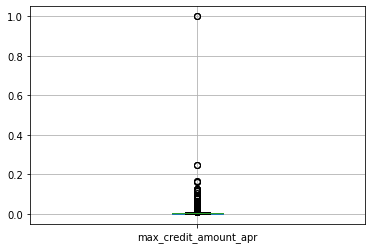

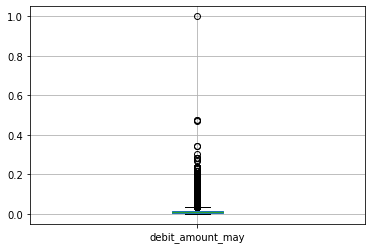

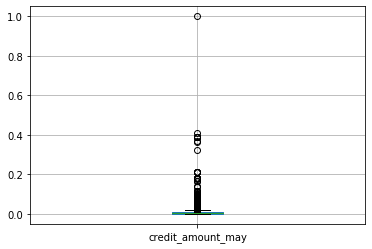

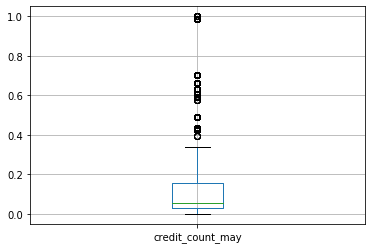

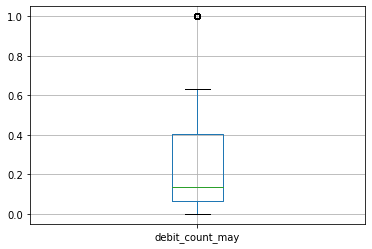

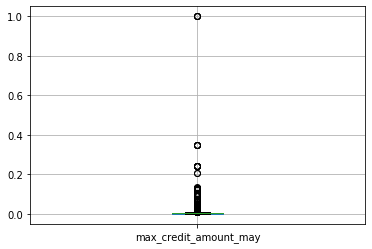

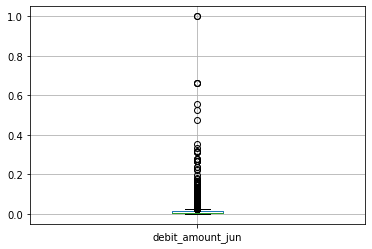

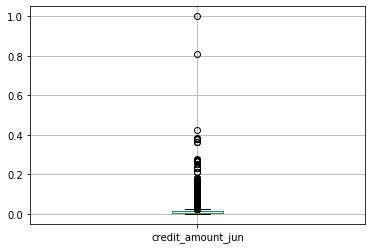

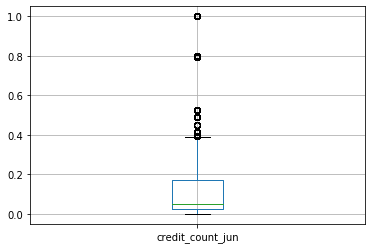

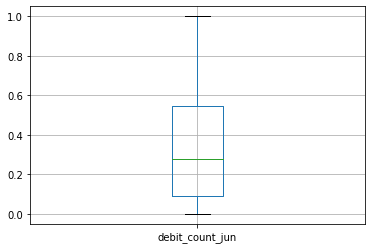

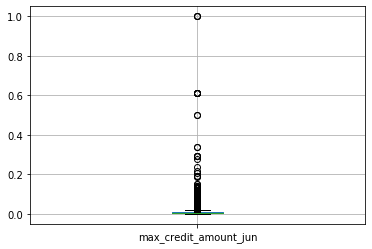

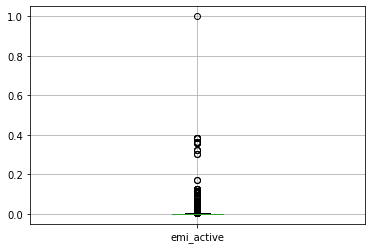

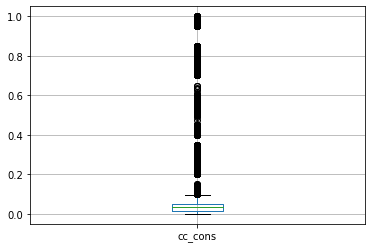

In [74]:
#outlier analysis
for col in minmax_scaled_df.columns:
    plt.figure()
    minmax_scaled_df.boxplot([col])